# Problem statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goal of the case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

# Proposed Solution:
To solve the problem, we take following major steps:
## Step1: Data understanding, Data Cleaning and Visualisation

## Step2: Model Pre-processing
    - Data Encoding
    - Splitting Data-Train and Test
    - Feature Scaling
    
## Step3: Machine Learning Model building - Logistic Regression
   
      
## Step4: Machine Learning Model Analysis with Training Data 
 
## Step5:  Adding Lead Score to the Training Data 

## Step6: Making Prediction using the Final Model with Test Data

## Step7: Machine Learning Model Analysis along with Test Data

## Step8: Conclusion/Inference From Machine Learning Model

Let's Perform above 8 Steps One by One. 

## Step1: Data understanding, Data Cleaning and Visualisation


In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

Matplotlib created a temporary config/cache directory at /var/folders/1w/2qdpts8s11zg34dptvw7qpx40000gn/T/matplotlib-9jr5480u because the default path (/Users/renukaupadhaya/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
data_leads = pd.read_csv("leads.csv")

In [3]:
# Check the head of the dataset
data_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Cheking size of the data
data_leads.shape

(9240, 37)

This dataset has:

9240 rows,
37 columns

In [5]:
# Checking data types
data_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Checking numerical columns
data_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Check for duplicates
sum(data_leads.duplicated(subset = 'Prospect ID')) == 0

True

No duplicates value in the Prospect ID

In [8]:
#check for duplicates
sum(data_leads.duplicated(subset = 'Lead Number')) == 0

True

No duplicate values in Lead Number

#### Checking for count of missing values in each rows.

In [9]:
# Missing values in each rows
missing_values_per_row = data_leads.isnull().sum(axis=1)
value_counts = missing_values_per_row.value_counts()
print(value_counts)

0     1943
4     1588
5     1220
1     1016
6      674
9      654
13     405
2      380
10     379
8      363
12     240
7      189
3      170
11      19
Name: count, dtype: int64


**No missing values in rows**

#### Checking for count of missing values in columns.

In [10]:
#Checking for count of missing values in each column
data_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

**There are few columns with quite a high number of missing/null values in the dataframe.**

In [11]:
#checking percentage of null values in each column.
null_percentage = round(100 * (data_leads.isnull().sum() / len(data_leads.index)), 2)
print(null_percentage.sort_values(ascending=False))

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [12]:
# Before droppiing
data_leads.shape

(9240, 37)

In [13]:
# Dropping columns with more than 40% missing values
column=data_leads.columns

for i in column:
    if((100*(data_leads[i].isnull().sum()/len(data_leads.index))) >= 40):
        data_leads.drop(columns = i, inplace = True)

In [14]:
# After dropping
data_leads.shape

(9240, 32)

In [15]:
#checking null values percentage again
null_percentage = round(100 * (data_leads.isnull().sum() / len(data_leads.index)), 2)
print(null_percentage.sort_values(ascending=False))

Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Prospect ID                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free cop

### Handling 'Select' values

In the Problem Statement, many of the categorical variables have a level called 'Select' which needs to be handled because such columns the data remained as default 'Select' for Select.

In [16]:
# Columns having 'Select' as value

columns_with_select_value = [col for col in data_leads.columns if len(data_leads[col].isin(['Select']).unique())>1]
print(columns_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [17]:
# Converting 'Select' value to NaN value.
data_leads = data_leads.replace('Select', np.nan)

In [18]:
# Checking if all 'Select' values have been converted or not
columns_with_select_value = [col for col in data_leads.columns if len(data_leads[col].isin(['Select']).unique())>1]
print(columns_with_select_value)

[]


**There are no select value in the dataframe "data_leads"**

### Handling missing Values (Categorical value Analysis)

1. **How did you hear about X Education**

In [19]:
#checking value counts/percentage of "How did you hear about X Education" column
value_counts_Edu = 100*data_leads['How did you hear about X Education'].value_counts(dropna=False)/len(data_leads)
value_counts_Edu.head()

How did you hear about X Education
NaN                      78.463203
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Name: count, dtype: float64

**Here we can see that'How did you hear about X Education'column has more than 78% null values.so it better to be drop this column.**

In [20]:
data_leads = data_leads.drop("How did you hear about X Education", axis = 1)

2. **Lead Profile**

In [21]:
#checking value counts/percentage of "How did you hear about X Education" column
Lead_Profile_value_counts = 100*data_leads['Lead Profile'].value_counts(dropna=False)/len(data_leads)
Lead_Profile_value_counts.head()

Lead Profile
NaN                      74.188312
Potential Lead           17.456710
Other Leads               5.270563
Student of SomeSchool     2.608225
Lateral Student           0.259740
Name: count, dtype: float64

**Here we can see that'Lead Profile'column has more than 74% null values.so it better to be drop this column.**

In [22]:
data_leads = data_leads.drop("Lead Profile", axis = 1)

3. **City**

In [23]:
#checking value counts/percentage of "City" column
City_value_counts = 100*data_leads['City'].value_counts(dropna=False)/len(data_leads)
City_value_counts.head()

City
NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Name: count, dtype: float64

In [24]:
data_leads['City'] = data_leads['City'].replace(np.nan,'Mumbai')

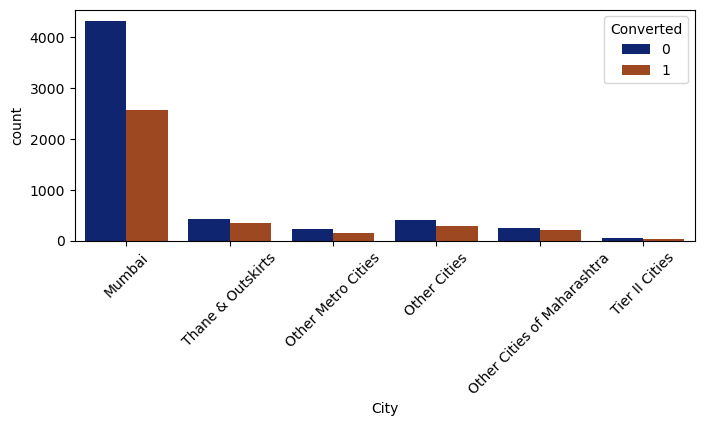

In [25]:
# plotting spread of City columnn 
custom_palette = sns.color_palette("dark")  
plt.figure(figsize=(8, 3))
sns.countplot(x='City', hue='Converted', data=data_leads, palette=custom_palette)
plt.xticks(rotation=45)
plt.show()

**City has 39 % missing values. Imputing missing values with Mumbai will make the data more skewed. Hence City column can be dropped.**

In [26]:
data_leads = data_leads.drop("City", axis = 1)

4. **Country**

In [27]:
#checking value counts/percentage of "Country" column
Country_value_counts = 100*data_leads['Country'].value_counts(dropna=False)/len(data_leads)
Country_value_counts.head()

Country
India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Name: count, dtype: float64

**More than 80% of the customers are from India.It does not make business sense to impute missing values with India.So,Country column can be dropped**

In [28]:
data_leads = data_leads.drop("Country", axis = 1)

5. **Tags**

In [29]:
#checking value counts/percentage of "Tags" column
Tags_value_counts = 100*data_leads['Tags'].value_counts(dropna=False)/len(data_leads)
Tags_value_counts.head()

Tags
NaN                                    36.287879
Will revert after reading the email    22.424242
Ringing                                13.019481
Interested in other courses             5.551948
Already a student                       5.032468
Name: count, dtype: float64

**Tags has 36% missing values. Tags are assigned to customers indicating the current status of the lead. Since this is current status, this column will not be useful for modeling.so it can be dropped.**

In [30]:
data_leads = data_leads.drop("Tags", axis = 1)

6. **What matters most to you in choosing a course**

In [31]:
#checking value counts/percentage of "What matters most to you in choosing a course " column
c_cossing_value_counts = 100*data_leads['What matters most to you in choosing a course'].value_counts(dropna=False)/len(data_leads)
c_cossing_value_counts.head()

What matters most to you in choosing a course
Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: count, dtype: float64

**Variable has 29% missing values and More than 70% people have selected 'better career prospects'.This is massively skewed and will not provide any insight.**

In [32]:
data_leads = data_leads.drop("What matters most to you in choosing a course", axis = 1)

In [33]:
# Checking again the null percentage
null_percentage = round(100 * (data_leads.isnull().sum() / len(data_leads.index)), 2)
print(null_percentage.sort_values(ascending=False))

Specialization                              36.58
What is your current occupation             29.11
TotalVisits                                  1.48
Page Views Per Visit                         1.48
Last Activity                                1.11
Lead Source                                  0.39
Prospect ID                                  0.00
X Education Forums                           0.00
A free copy of Mastering The Interview       0.00
I agree to pay the amount through cheque     0.00
Get updates on DM Content                    0.00
Update me on Supply Chain Content            0.00
Receive More Updates About Our Courses       0.00
Through Recommendations                      0.00
Digital Advertisement                        0.00
Newspaper                                    0.00
Search                                       0.00
Newspaper Article                            0.00
Magazine                                     0.00
Lead Number                                  0.00


In [34]:
# Remaining columns with non-numeric data type
cat_cols = data_leads.select_dtypes(include=['category', 'object']).columns.tolist()
print(cat_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [35]:
# columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              #'What is your current occupation','Country','Last Activity','Lead Source']

7. **Specialization**

In [36]:
#checking value counts/percentage of "Specialization" column
Specialization_value_counts = 100*data_leads['Specialization'].value_counts(dropna=False)/len(data_leads)
Specialization_value_counts.head()

Specialization
NaN                          36.580087
Finance Management           10.562771
Human Resource Management     9.177489
Marketing Management          9.069264
Operations Management         5.443723
Name: count, dtype: float64

In [37]:
data_leads['Specialization'].fillna('Other_category', inplace=True)
# Verify the changes
print(100*data_leads['Specialization'].value_counts(dropna=False)/len(data_leads))


Specialization
Other_category                       36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: count, dtype: float64


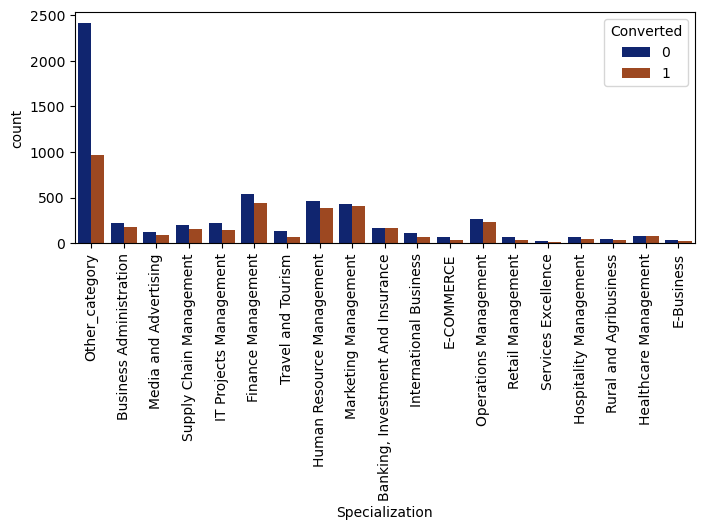

In [38]:
# Specialization columnn after replacing NaN values
custom_palette = sns.color_palette("dark")  

plt.figure(figsize=(8, 3))
sns.countplot(x='Specialization', hue='Converted', data=data_leads, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

**We see that specialization with Management in them have higher number of leads. So this is a significant variable .Hence imputation or dropping is not a good choice. We need to create others category**

8. **What is your current occupation**

In [39]:
# checking value counts/percentage of "What is your current occupation" column
c__occu_value_counts = 100*data_leads['What is your current occupation'].value_counts(dropna=False)/len(data_leads)
c__occu_value_counts.head()

What is your current occupation
Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Name: count, dtype: float64

In [40]:
data_leads['What is your current occupation'].fillna('Unemployed', inplace=True)
# Verify the changes
print(100*data_leads['What is your current occupation'].value_counts(dropna=False)/len(data_leads))

What is your current occupation
Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: count, dtype: float64


**We can impute the missing values with 'Unemployed' as it has the most values. This seems to be a important variable from business context.**

9. **Lead Source**

In [41]:
# checking value counts/percentage of "Lead Source" column
Lead_Source_value_counts = 100*data_leads['Lead Source'].value_counts(dropna=False)/len(data_leads)
Lead_Source_value_counts.head()

Lead Source
Google            31.038961
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Reference          5.779221
Name: count, dtype: float64

In [42]:
data_leads['Lead Source'].fillna('Google', inplace=True)
# Verify the changes
print(100*data_leads['Lead Source'].value_counts(dropna=False)/len(data_leads))

Lead Source
Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: count, dtype: float64


**"Google" having highest number of occurences ,hence we will impute the missing values with 'Google'**

10. **Last Activity**

In [43]:
# checking value counts/percentage of "Last Activity" column
Last_Activity_value_counts = 100*data_leads['Last Activity'].value_counts(dropna=False)/len(data_leads)
Last_Activity_value_counts.head()

Last Activity
Email Opened               37.196970
SMS Sent                   29.707792
Olark Chat Conversation    10.530303
Page Visited on Website     6.926407
Converted to Lead           4.632035
Name: count, dtype: float64

In [44]:
data_leads['Last Activity'].fillna('Email Opened', inplace=True)
# Verify the changes
print(100*data_leads['Last Activity'].value_counts(dropna=False)/len(data_leads))

Last Activity
Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: count, dtype: float64


**"Email Opened" is having highest number of values so will impute the missing values with label 'Email Opened'.**

In [45]:
# Re Checking the percentage of null values for remaining columns
null_percentage = round(100 * (data_leads.isnull().sum() / len(data_leads.index)), 2)
print(null_percentage.sort_values(ascending=False))

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

### Handling missing Values(Numerical value Analysis)

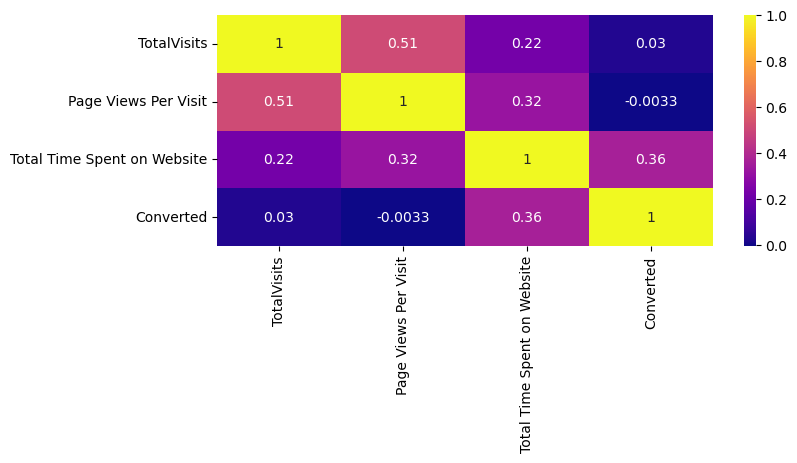

In [46]:
# Checking the correlations of numerical variables
numerical_vars = data_leads[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website','Converted']]
plt.figure(figsize=(8, 3))
sns.heatmap(numerical_vars.corr(), annot=True, cmap='plasma')
plt.show()

#### TotalVisits

In [47]:
# checking value counts/percentage of "TotalVisits" column
TotalVisits_value_counts = 100*data_leads['TotalVisits'].value_counts(dropna=False)/len(data_leads)
TotalVisits_value_counts.head()

TotalVisits
0.0    23.690476
2.0    18.181818
3.0    14.134199
4.0    12.121212
5.0     8.474026
Name: count, dtype: float64

**Missing values in 'TotalVisits' can be imputed with mode**

In [48]:
data_leads['TotalVisits'].fillna(data_leads['TotalVisits'].mode()[0], inplace=True)

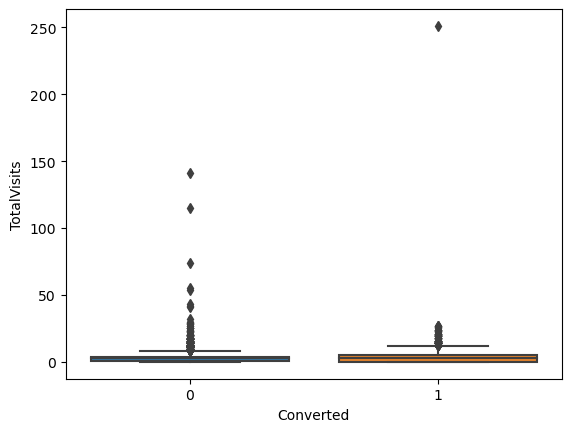

In [49]:
#checking Spread of "TotalVisits" vs Converted variable

sns.boxplot(x=data_leads.Converted, y=data_leads['TotalVisits'])
plt.show()

#### Page Views Per Visit

In [50]:
# checking value counts/percentage of "Page Views Per Visit" column
Page_Views_Per_Visit_value_counts = 100*data_leads['Page Views Per Visit'].value_counts(dropna=False)/len(data_leads)
Page_Views_Per_Visit_value_counts.head()

Page Views Per Visit
0.0    23.690476
2.0    19.426407
3.0    12.943723
4.0     9.696970
1.0     7.045455
Name: count, dtype: float64

**Missing values in 'Page Views Per Visit' can be imputed with mode**

In [51]:
data_leads['Page Views Per Visit'].fillna(data_leads['Page Views Per Visit'].mode()[0], inplace=True)

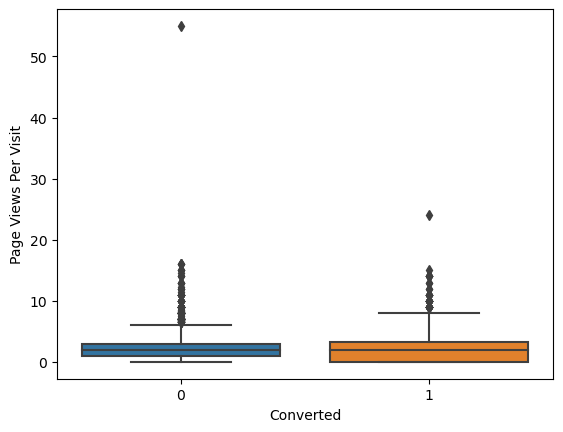

In [52]:
#checking Spread of "Page Views Per Visite" vs Converted variable

sns.boxplot(x=data_leads.Converted, y=data_leads['Page Views Per Visit'])
plt.show()

#### Total Time Spent on Website

In [53]:
# checking value counts/percentage of "Total Time Spent on Website" column
Total_Time_Spent_on_Website_value_counts = 100*data_leads['Total Time Spent on Website'].value_counts(dropna=False)/len(data_leads)
Total_Time_Spent_on_Website_value_counts.head()

Total Time Spent on Website
0      23.733766
60      0.205628
74      0.194805
75      0.194805
127     0.194805
Name: count, dtype: float64

**Missing values in 'Total Time Spent on Website' can be imputed with mode**

In [54]:
data_leads['Total Time Spent on Website'].fillna(data_leads['Total Time Spent on Website'].mode()[0], inplace=True)

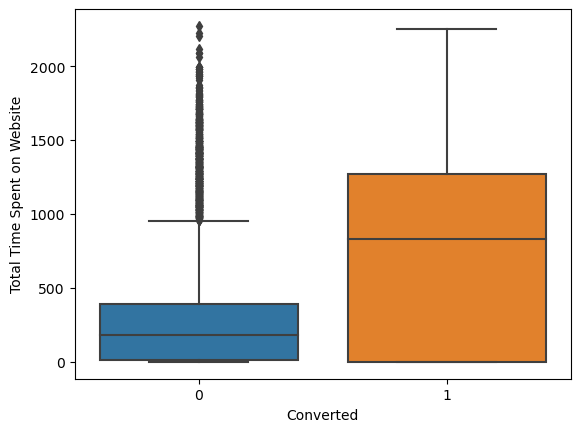

In [55]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=data_leads.Converted, y=data_leads['Total Time Spent on Website'])
plt.show()

#### Re-checking the null values for columns

In [56]:
# Re Checking the percentage of null values
null_percentage = round(100 * (data_leads.isnull().sum() / len(data_leads.index)), 2)
print(null_percentage.sort_values(ascending=False))

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

In [57]:
data_leads.shape

(9240, 26)

In [58]:
data_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


**Columns 'Prospect ID','Lead Number' has no use for modelling so we are dropping these column:**

In [59]:
data_leads.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

### Handling columns with only one unique value


In [60]:
data_leads.describe(include = 'object')

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,5,21,2,2,17,19,6,2,1,2,2,2,2,2,1,1,1,1,2,16
top,Landing Page Submission,Google,No,No,Email Opened,Other_category,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
freq,4886,2904,8506,9238,3540,3380,8290,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,9240,6352,3407


These columns have same one unique value: Magazine,Receive More Updates About Our Courses,Update me on SupplyChain Content,Get updates on DM Content,I agree to pay the amount through cheque'.These columns are of no use as they have only one category of response from people and these can be dropped.

In [61]:
data_leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [62]:
# Re Checking the percentage of null values
null_percentage = round(100 * (data_leads.isnull().sum() / len(data_leads.index)), 2)
print(null_percentage.sort_values(ascending=False))

Lead Origin                               0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
Search                                    0.0
Specialization                            0.0
Lead Source                               0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
Last Notable Activity                     0.0
dtype: float64


### Checking Leftover columns in categorical variables.

#### Through Recommendations

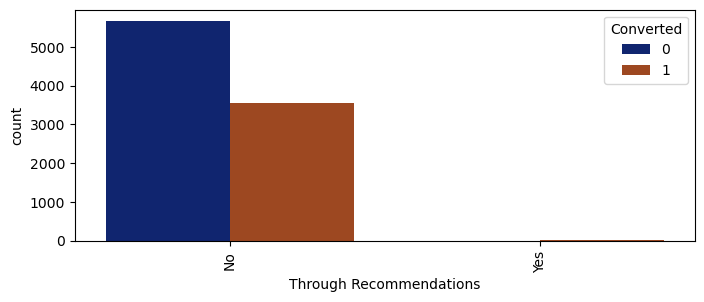

In [63]:
# Through Recommendations columnn visulisation.
custom_palette = sns.color_palette("dark")  
plt.figure(figsize=(8, 3))
sns.countplot(x='Through Recommendations', hue='Converted', data=data_leads, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

**Here we can see that Through Recommendations will not add any value to the model "No" has a much higher frequency indicating that the majority of the observations fall into the "No" category.so we are dropping this column.**

In [64]:
data_leads.drop(['Through Recommendations'],axis=1,inplace=True)

#### Digital Advertisement

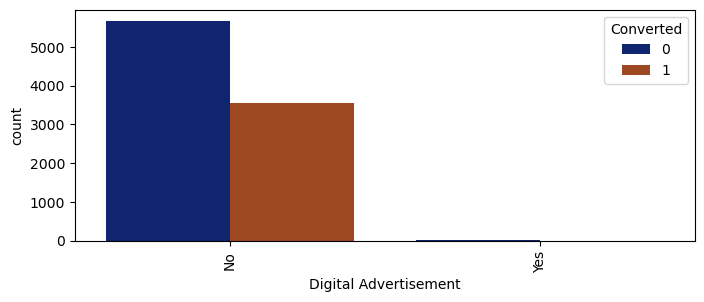

In [65]:
# Digital Advertisement columnn visulisation.
custom_palette = sns.color_palette("dark")  
plt.figure(figsize=(8, 3))
sns.countplot(x='Digital Advertisement', hue='Converted', data=data_leads, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

**Digital Advertisement will not add any value to the model "No" has a much higher frequency indicating that the majority of the observations fall into the "No" category.so we are dropping this column.**

In [66]:
data_leads.drop(['Digital Advertisement'],axis=1,inplace=True)

#### Search

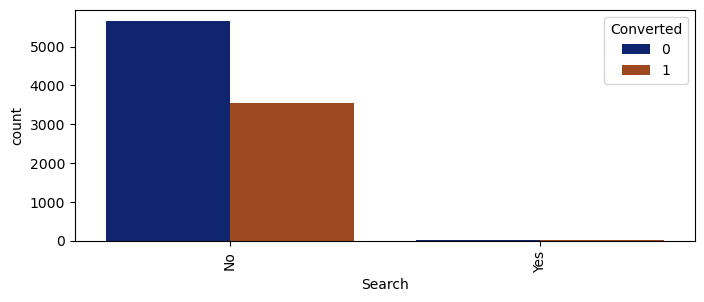

In [67]:
# Search columnn visulisation.
custom_palette = sns.color_palette("dark")  
plt.figure(figsize=(8, 3))
sns.countplot(x='Search', hue='Converted', data=data_leads, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

**Search will not add any value to the model "No" has a much higher frequency indicating that the majority of the observations fall into the "No" category.so we are dropping this column.**

In [68]:
data_leads.drop(['Search'],axis=1,inplace=True)

#### Newspaper Article

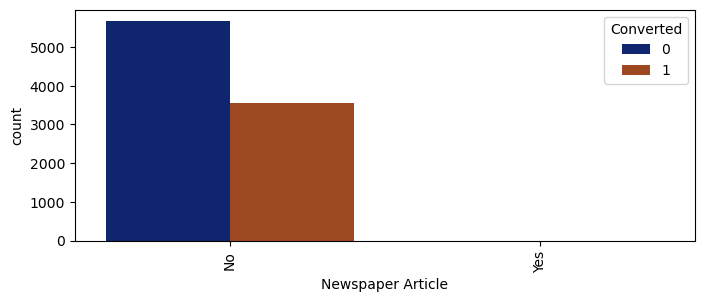

In [69]:
# Newspaper Article columnn visulisation.
custom_palette = sns.color_palette("dark")  
plt.figure(figsize=(8, 3))
sns.countplot(x='Newspaper Article', hue='Converted', data=data_leads, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

**Newspaper Article will not add any value to the model "No" has a much higher frequency indicating that the majority of the observations fall into the "No" category.so we are dropping this column.**

In [70]:
data_leads.drop(['Newspaper Article'],axis=1,inplace=True)

#### X Education Forums

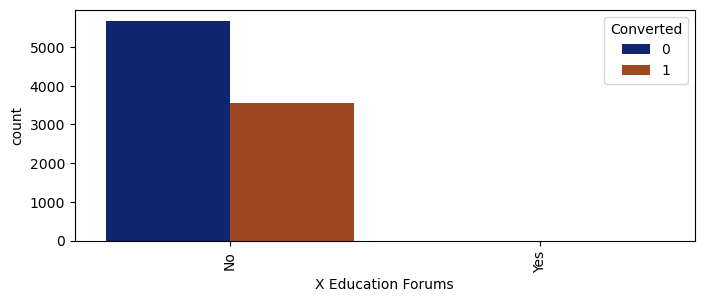

In [71]:
# X Education Forums columnn visulisation.
custom_palette = sns.color_palette("dark")  
plt.figure(figsize=(8, 3))
sns.countplot(x='X Education Forums', hue='Converted', data=data_leads, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

**X Education Forums will not add any value to the model "No" has a much higher frequency indicating that the majority of the observations fall into the "No" category.so we are dropping this column.**

In [72]:
data_leads.drop(['X Education Forums'],axis=1,inplace=True)

#### Newspaper

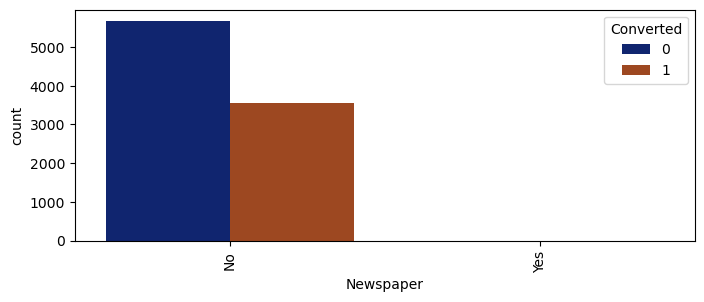

In [73]:
# Newspaper columnn visulisation.
custom_palette = sns.color_palette("dark")  
plt.figure(figsize=(8, 3))
sns.countplot(x='Newspaper', hue='Converted', data=data_leads, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

**Newspaper will not add any value to the model "No" has a much higher frequency indicating that the majority of the observations fall into the "No" category.so we are dropping this column.**

In [74]:
data_leads.drop(['Newspaper'],axis=1,inplace=True)

#### Do Not Call

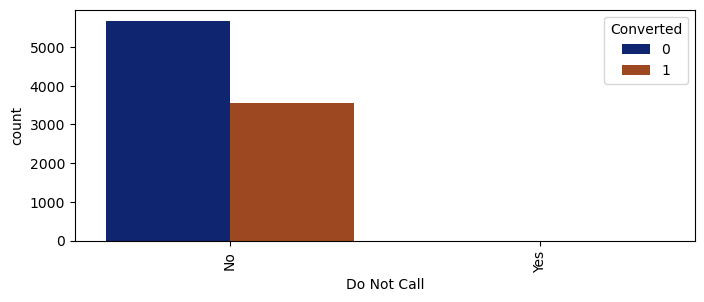

In [75]:
# Do Not Call columnn visulisation.
custom_palette = sns.color_palette("dark")  
plt.figure(figsize=(8, 3))
sns.countplot(x='Do Not Call', hue='Converted', data=data_leads, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

**Do Not Call will not add any value to the model "No" has a much higher frequency indicating that the majority of the observations fall into the "No" category.so we are dropping this column.**

In [76]:
data_leads.drop(['Do Not Call'],axis=1,inplace=True)

In [77]:
# Re Checking the percentage of null values
null_percentage = round(100 * (data_leads.isnull().sum() / len(data_leads.index)), 2)
print(null_percentage.sort_values(ascending=False))

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64


## Step2: Model Pre-processing 
###    - Data Encoding
###    - Splitting Data-Train and Test
###    - Feature Scaling

###  Encoding The Data - Creating Dummy Variables.

In [78]:
# Checking the columns which are of type 'object'
check = data_leads.loc[:, data_leads.dtypes == 'object']
check.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [79]:
# Creating  Demo Cell
data = pd.DataFrame({'a': ['a', 'b', 'a'],'col1': ['a', 'b', 'a']})

# Create dummy variables,Converting True/False to 0/1
dummies = pd.get_dummies(data).astype(int)
print(dummies)

   a_a  a_b  col1_a  col1_b
0    1    0       1       0
1    0    1       0       1
2    1    0       1       0


In [80]:
import pandas as pd

# Assuming data_leads is your DataFrame

# Creating dummy variables for multiple categorical columns
dummy_var = pd.get_dummies(data_leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                                        'What is your current occupation', 'A free copy of Mastering The Interview', 
                                        'Last Notable Activity', 'Specialization']]).astype(int)
# print(dummy_var)
# Concatenating the dummy variables to the original DataFrame
data_leads = pd.concat([data_leads, dummy_var], axis=1)

# Creating dummy variable separately for the variable 'Specialization' 
# since it has the level 'Select' as 'Other_category' which is not useful
dummy_var_specialization = pd.get_dummies(data_leads['Specialization'], prefix='Specialization').astype(int)

# Check if 'Other_category' is in columns before dropping
if 'Other_category' in dummy_var_specialization.columns:
    dummy_var_specialization = dummy_var_specialization.drop('Other_category', axis=1)

# Concatenating the 'Specialization' dummy variables to the main DataFrame
data_leads = pd.concat([data_leads, dummy_var_specialization], axis=1)

# Dropping the original columns for which the dummy variables have been created
columns_to_drop = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'What is your current occupation', 'A free copy of Mastering The Interview', 
                   'Last Notable Activity', 'Specialization']

# Drop the specified columns
data_leads = data_leads.drop(columns=columns_to_drop, errors='ignore')


In [81]:
# Checking the dataset again to verify.
data_leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_category,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Splitting the Data into Training and Testing Sets


The first basic step for regression is performing a train-test split.

In [82]:
# Loading libraries from sklearn
from sklearn.model_selection import train_test_split

In [83]:
# Putting response variable to y
y = data_leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [84]:
X=data_leads.drop('Converted', axis=1)

In [85]:
# Spliting the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [86]:
# Checking the shape
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 110) 
y_train: (6468,)


In [87]:
# Checking the shape
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 110) 
y_test: (2772,)


### Scaling of Data - Standardisation Method

#### Scaling the numeric variables 

In [88]:
# using standard scaler for scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [89]:
specific_cols = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']  

# Use the specified columns for scaling
X_train[specific_cols] = scaler.fit_transform(X_train[specific_cols])

In [90]:
# Display the scaled DataFrame
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_category,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1871,-0.645678,-0.885371,-1.062143,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6795,0.109111,0.005716,-0.452487,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3516,0.297808,-0.691418,0.083827,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8105,0.297808,1.365219,1.229797,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3934,-0.645678,-0.885371,-1.062143,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Looking at Correlations

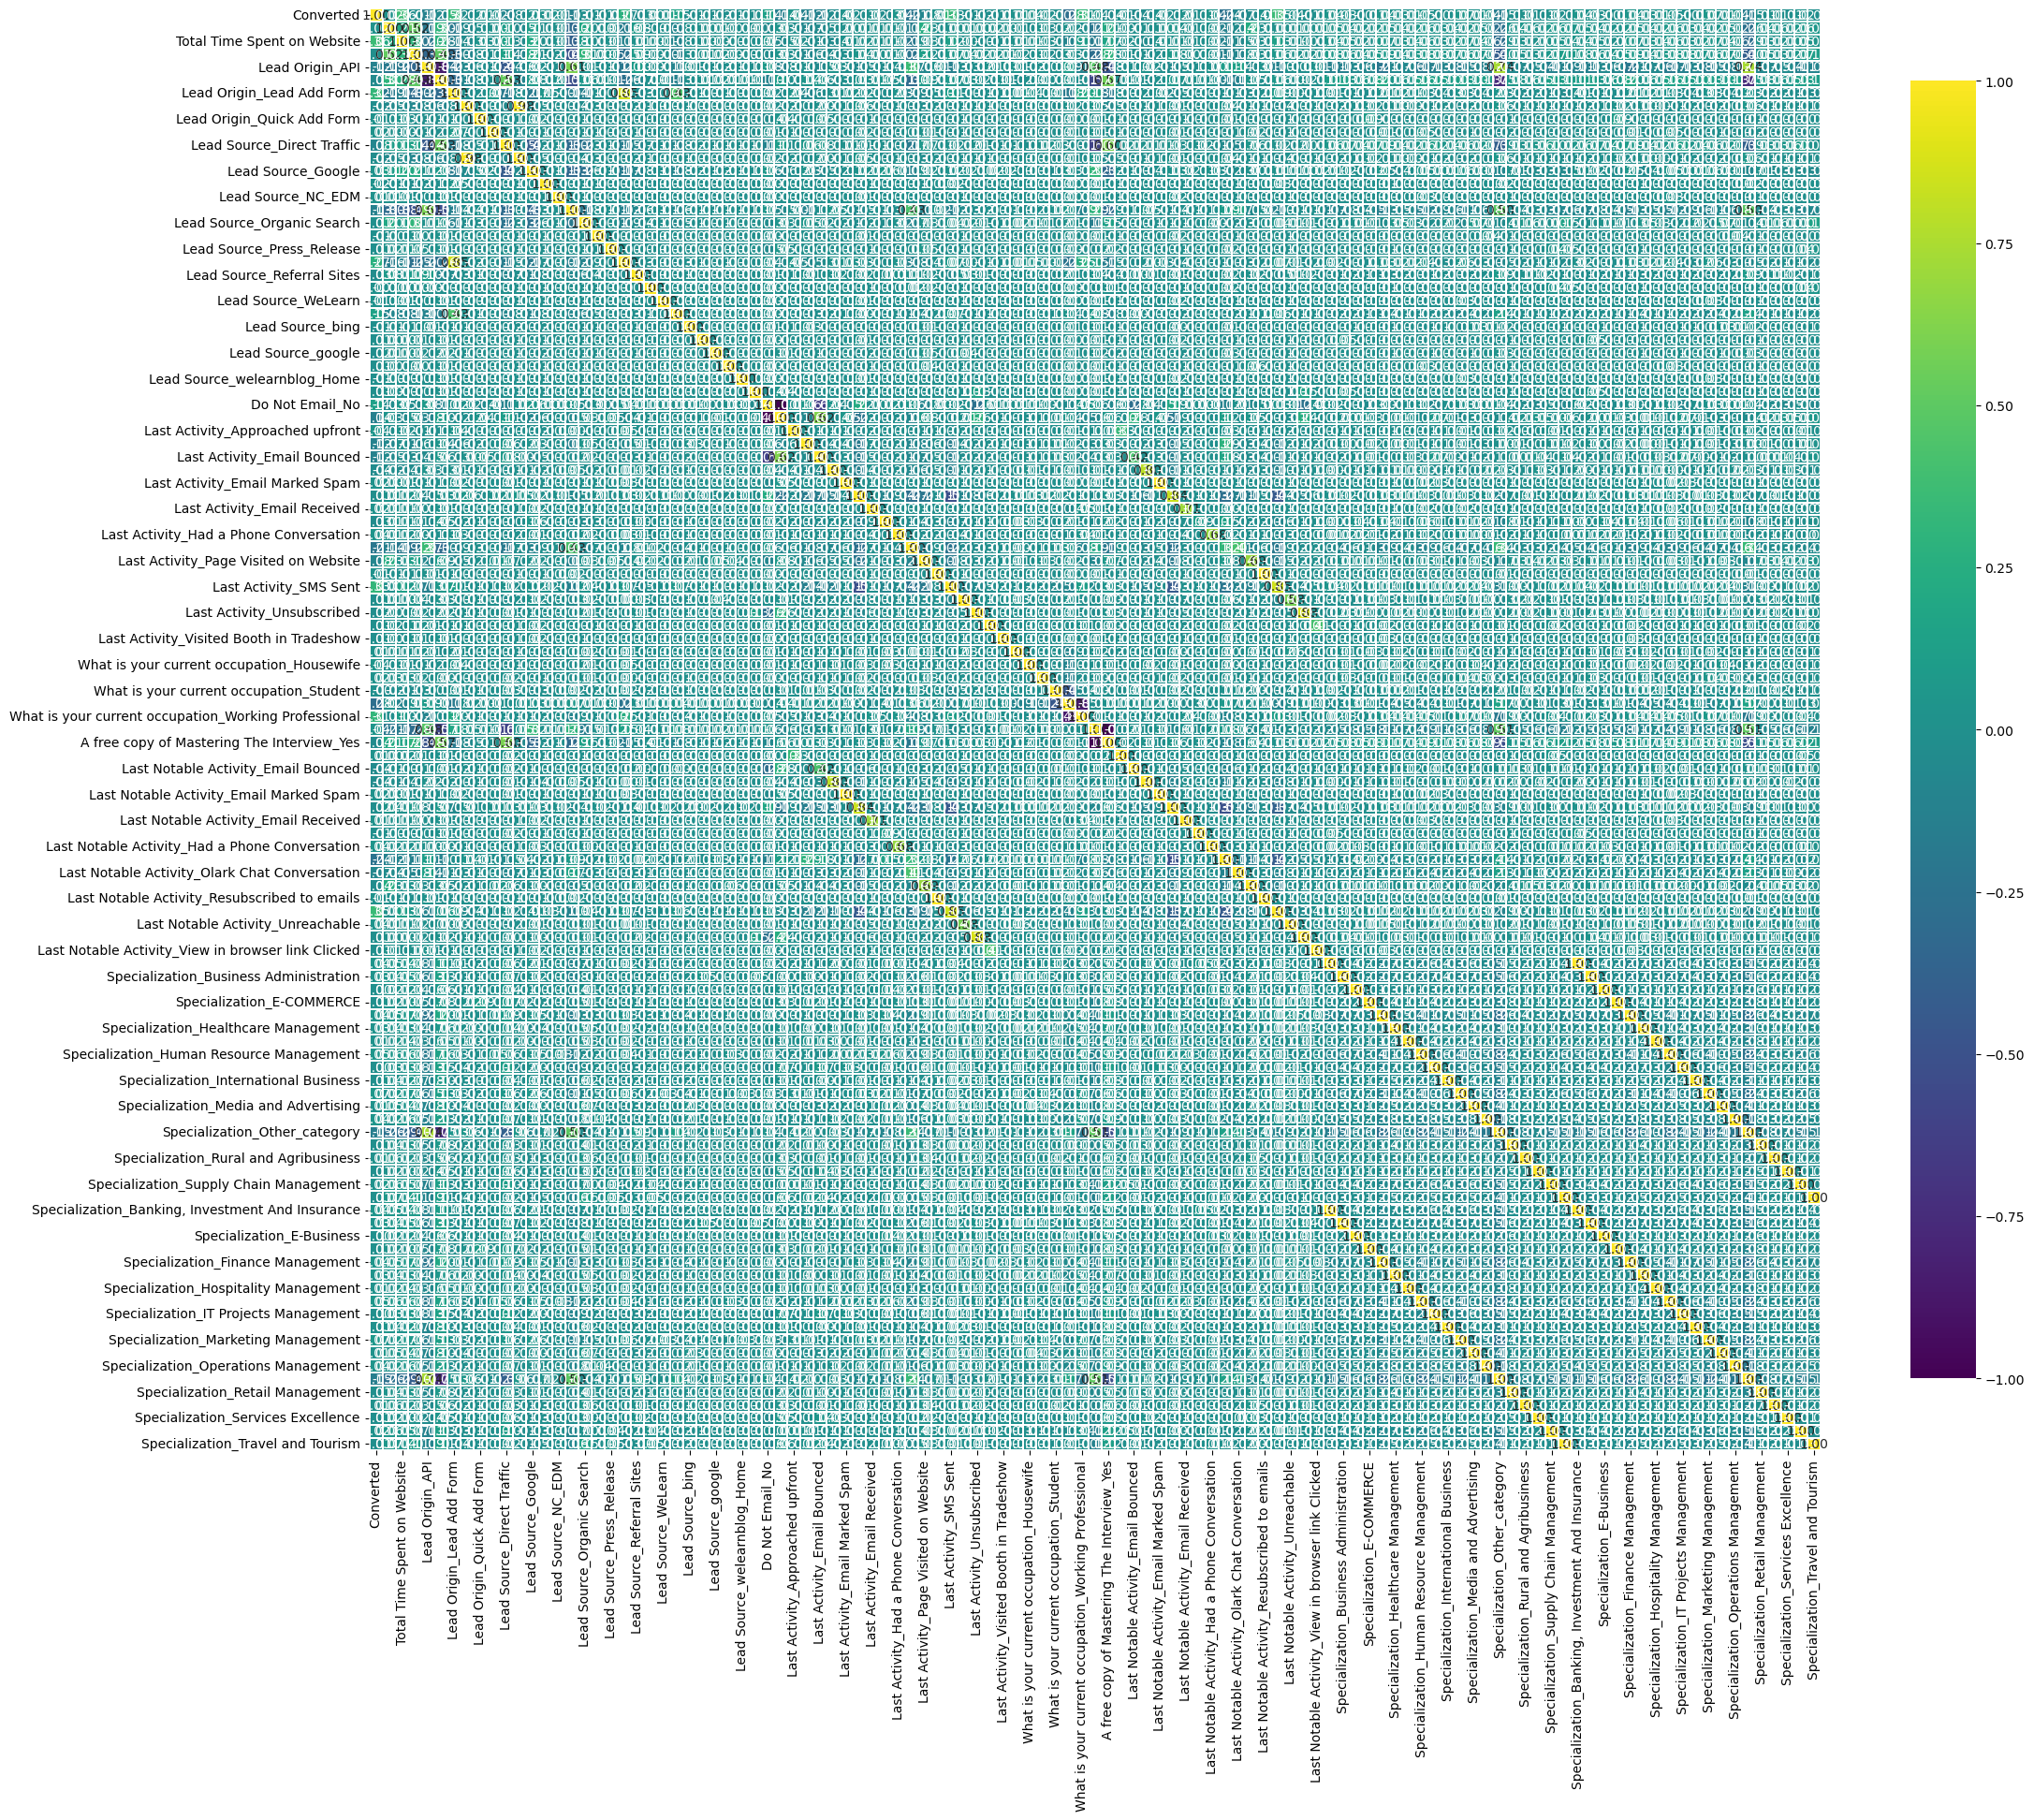

In [91]:
plt.figure(figsize=(25, 20))        
sns.heatmap(data_leads.corr(), 
            linewidths=0.3, 
            cmap="viridis", 
            annot=True, 
            fmt='.2f',  # Format annotation values to two decimal places
            annot_kws={"size": 10},  # Adjust font size
            vmin=-1, vmax=1,  
            linecolor='white',  
            cbar_kws={"shrink": 0.9}  
           )
plt.show()

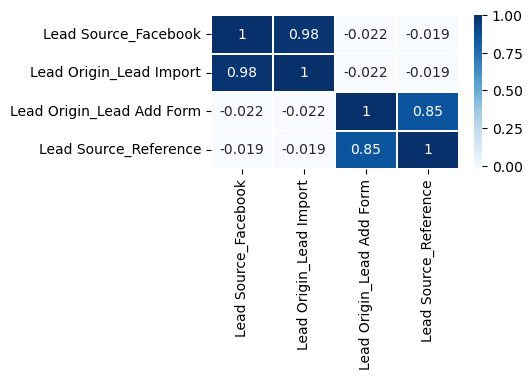

In [92]:
plt.figure(figsize = (4,2))        
sns.heatmap(data_leads[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

## Step3: Machine Learning Model building - Logistic Regression

In [93]:
import statsmodels.api as sm
# Generic Function to Build Model

def build_model(train_df, params=None):
    # Add a constant
    if params:
        X_train_lm = sm.add_constant(train_df[params])
    else:
        X_train_lm = sm.add_constant(train_df)
    logm = sm.GLM(y_train,train_df,family = sm.families.Binomial()).fit()  
    return logm

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
log_reg = LogisticRegression()
rfe = RFE(log_reg)            
rfe = rfe.fit(X_train, y_train)
l = sorted( list(zip(X_train.columns, rfe.support_,rfe.ranking_)), key=lambda x: x[-1] )[:25] 
#l = [('Total Time Spent on Website', True, 1), ('Lead Origin_API', True, 1),.. ]
cols_25 = [k[0] for k in l] # Lets Pick Top 25 Features 
X_train_rfe = X_train[cols_25] 

###  Building Machine Learning Training Model : Model1
**with the parameters emmited by RFE**

In [95]:
model1 = build_model(train_df=X_train_rfe, params=None)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3052.2
Date:                Sun, 07 Jan 2024   Deviance:                       6104.4
Time:                        15:05:08   Pearson chi2:                 6.71e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3199
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Total Time Spent on Website                 1.1051      0.037     29.870      0.000       1.033       1.178
Lead Origin_API                           -23.2973   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Origin_Landing Page Submission       -23.3323   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Origin_Lead Add Form                 -19.4916   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Origin_Lead Import                   -23.2313   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Click2call                     -2.0174      1.312     -1.538      0.124      -4.589       0.554
Lead Source_Direct Traffic                 -0.2728      0.082     -3.334      0.001      -0.433      -0.112
Lead Source_Facebook                       -0.6836      1.851     -0.369      0.712      -4.311       2.944
Lead Source_NC_EDM                         23.2871   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                      0.9392      0.111      8.427      0.000       0.721       1.158
Lead Source_Social Media                    1.4386      1.422      1.012      0.312      -1.348       4.225
Lead Source_WeLearn                        22.7755   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                1.6907      0.745      2.269      0.023       0.230       3.151
Lead Source_blog                          -23.3314   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_google                        -23.1380   3.19e+04     -0.001      0.999   -6.25e+04    6.24e+04
Do Not Email_No                            22.7072   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email_Yes                           21.6779   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Last Activity_Approached upfront           22.3102   2.58e+04      0.001      0.999   -5.06e+04    5.07e+04
Last Activity_Converted to Lead            -1.6300      0.203     -8.037      0.000      -2.028      -1.233
Last Activity_Email Bounced                -1.6151      0.338     -4.777      0.000      -2.278      -0.952
Last Activity_Email Link Clicked           -0.9552      0.207     -4.622      0.000      -1.360      -0.550
Last Activity_Email Marked Spam            22.7410   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Last Activity_Form Submitted on Website    -0.9565      0.310     -3.083      0.002      -1.565      -0.348
Last Activity_Had a Phone Conversation      1.7443      0.637      2.740      0.006       0.497       2.992
Last Activity_Olark Chat Conversation      -1.9416      0.157    -12.343      0.000      -2.250      -1.633
===========================================================

**As seen above we have manay parameters who has very high P-Value. Generally, we willl drop all parameters 
having P-Value > 0.05.However, we would also need to check VIF( variable Inflation Factor ) before deciding. Once we have VIF, we will drop High VIF(>5) and High P-value upfront and Will assess the parameters with high VIF , Low P-value and vice-versa**

#### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [96]:
# Generic function to calculate VIF of variables
from statsmodels.stats.outliers_influence import variance_inflation_factor as v
def cal_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [v(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

**Lets calculate VIF.**

In [97]:
vif=cal_VIF(X_train_rfe)
vif

,Features,VIF
15,Do Not Email_No,6001.38
2,Lead Origin_Landing Page Submission,1622.47
1,Lead Origin_API,1545.18
16,Do Not Email_Yes,511.70
3,Lead Origin_Lead Add Form,477.63
4,Lead Origin_Lead Import,49.74
7,Lead Source_Facebook,16.67
9,Lead Source_Olark Chat,1.94
19,Last Activity_Email Bounced,1.68
6,Lead Source_Direct Traffic,1.40


In [98]:
# Lets Drop the COlumns with High P-Value & High VIF.
to_drop=['Do Not Email_No','Do Not Email_Yes','Lead Source_Facebook','Lead Origin_Lead Import','Lead Origin_API']

### Building Machine Learning Training Model : Model2
**lets Build the Model again after dropping the above parameters**

In [99]:
X_train_rfe1 = X_train_rfe.drop(columns=to_drop)
model2 = build_model(train_df=X_train_rfe1, params=None)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3112.8
Date:                Sun, 07 Jan 2024   Deviance:                       6225.5
Time:                        15:05:08   Pearson chi2:                 6.73e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3071
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Total Time Spent on Website                 1.0752      0.037     29.342      0.000       1.003       1.147
Lead Origin_Landing Page Submission        -0.6262      0.058    -10.811      0.000      -0.740      -0.513
Lead Origin_Lead Add Form                   3.1500      0.176     17.920      0.000       2.805       3.495
Lead Source_Click2call                     -1.9697      1.309     -1.505      0.132      -4.535       0.595
Lead Source_Direct Traffic                 -0.3275      0.081     -4.057      0.000      -0.486      -0.169
Lead Source_NC_EDM                         23.3126   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                      0.3369      0.083      4.076      0.000       0.175       0.499
Lead Source_Social Media                    1.2383      1.417      0.874      0.382      -1.538       4.015
Lead Source_WeLearn                        22.8148   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                1.6265      0.745      2.184      0.029       0.167       3.086
Lead Source_blog                          -23.3198   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_google                        -23.2348   3.29e+04     -0.001      0.999   -6.45e+04    6.44e+04
Last Activity_Approached upfront           22.3227   2.58e+04      0.001      0.999   -5.06e+04    5.07e+04
Last Activity_Converted to Lead            -1.8204      0.200     -9.110      0.000      -2.212      -1.429
Last Activity_Email Bounced                -2.5900      0.288     -8.988      0.000      -3.155      -2.025
Last Activity_Email Link Clicked           -1.0660      0.204     -5.215      0.000      -1.467      -0.665
Last Activity_Email Marked Spam            21.8419   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Last Activity_Form Submitted on Website    -1.0526      0.310     -3.399      0.001      -1.660      -0.446
Last Activity_Had a Phone Conversation      1.5214      0.625      2.433      0.015       0.296       2.747
Last Activity_Olark Chat Conversation      -2.1224      0.155    -13.705      0.000      -2.426      -1.819
===========================================================================================================
"""

In [100]:
vif=cal_VIF(X_train_rfe1)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.04
4,Lead Source_Direct Traffic,1.92
6,Lead Source_Olark Chat,1.50
19,Last Activity_Olark Chat Conversation,1.36
2,Lead Origin_Lead Add Form,1.25
9,Lead Source_Welingak Website,1.22
0,Total Time Spent on Website,1.21
13,Last Activity_Converted to Lead,1.05
14,Last Activity_Email Bounced,1.05
15,Last Activity_Email Link Clicked,1.04


In [101]:
# Let's Remove the Cols with very High P-Value 
to_drop = ['Lead Source_NC_EDM','Lead Source_blog','Lead Source_Social Media','Last Activity_Approached upfront','Lead Source_google','Last Activity_Email Marked Spam','Lead Source_WeLearn']
X_train_rfe2 = X_train_rfe1.drop(columns=to_drop)

### Building Machine Learning Training Model : Model3
**lets Build the Model again after dropping the above parameters**

In [102]:
model3 = build_model(train_df=X_train_rfe2, params=None)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3119.4
Date:                Sun, 07 Jan 2024   Deviance:                       6238.8
Time:                        15:05:09   Pearson chi2:                 6.74e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3057
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Total Time Spent on Website                 1.0768      0.037     29.409      0.000       1.005       1.149
Lead Origin_Landing Page Submission        -0.6301      0.058    -10.902      0.000      -0.743      -0.517
Lead Origin_Lead Add Form                   3.1538      0.176     17.948      0.000       2.809       3.498
Lead Source_Click2call                     -1.9725      1.309     -1.507      0.132      -4.538       0.593
Lead Source_Direct Traffic                 -0.3230      0.081     -4.006      0.000      -0.481      -0.165
Lead Source_Olark Chat                      0.3410      0.083      4.130      0.000       0.179       0.503
Lead Source_Welingak Website                1.6242      0.745      2.181      0.029       0.164       3.084
Last Activity_Converted to Lead            -1.8205      0.200     -9.108      0.000      -2.212      -1.429
Last Activity_Email Bounced                -2.5912      0.288     -8.990      0.000      -3.156      -2.026
Last Activity_Email Link Clicked           -1.0668      0.204     -5.219      0.000      -1.467      -0.666
Last Activity_Form Submitted on Website    -1.0523      0.310     -3.396      0.001      -1.660      -0.445
Last Activity_Had a Phone Conversation      1.5231      0.626      2.435      0.015       0.297       2.749
Last Activity_Olark Chat Conversation      -2.1185      0.154    -13.714      0.000      -2.421      -1.816
===========================================================================================================
"""

In [103]:
vif=cal_VIF(X_train_rfe2)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.03
4,Lead Source_Direct Traffic,1.91
5,Lead Source_Olark Chat,1.50
12,Last Activity_Olark Chat Conversation,1.36
2,Lead Origin_Lead Add Form,1.25
6,Lead Source_Welingak Website,1.22
0,Total Time Spent on Website,1.20
7,Last Activity_Converted to Lead,1.05
8,Last Activity_Email Bounced,1.05
9,Last Activity_Email Link Clicked,1.04


***Though VIF values looks good , P-Value is non-zeros: for Lead Source_Click2call is 0.132 & Lead Source_Welingak Website is 0.029 so lets drop it considering other parameters are good enough*** 

In [104]:
X_train_rfe3 = X_train_rfe2.drop(columns=['Lead Source_Click2call','Lead Source_Welingak Website'])

### Building Machine Learning Training Model : Model4
***Lets Build the Model again after dropping Lead Source_Click2call parameter***

In [105]:
model4 = build_model(train_df=X_train_rfe3, params=None)
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3124.1
Date:                Sun, 07 Jan 2024   Deviance:                       6248.3
Time:                        15:05:09   Pearson chi2:                 6.78e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3046
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Total Time Spent on Website                 1.0761      0.037     29.389      0.000       1.004       1.148
Lead Origin_Landing Page Submission        -0.6299      0.058    -10.901      0.000      -0.743      -0.517
Lead Origin_Lead Add Form                   3.3061      0.169     19.619      0.000       2.976       3.636
Lead Source_Direct Traffic                 -0.3230      0.081     -4.007      0.000      -0.481      -0.165
Lead Source_Olark Chat                      0.3404      0.083      4.123      0.000       0.179       0.502
Last Activity_Converted to Lead            -1.8202      0.200     -9.108      0.000      -2.212      -1.428
Last Activity_Email Bounced                -2.5823      0.287     -8.982      0.000      -3.146      -2.019
Last Activity_Email Link Clicked           -1.0605      0.204     -5.211      0.000      -1.459      -0.662
Last Activity_Form Submitted on Website    -1.0558      0.310     -3.402      0.001      -1.664      -0.447
Last Activity_Had a Phone Conversation      1.5195      0.626      2.427      0.015       0.292       2.747
Last Activity_Olark Chat Conversation      -2.1204      0.155    -13.714      0.000      -2.423      -1.817
===========================================================================================================
"""

In [106]:
vif=cal_VIF(X_train_rfe3)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.03
3,Lead Source_Direct Traffic,1.91
4,Lead Source_Olark Chat,1.50
10,Last Activity_Olark Chat Conversation,1.36
0,Total Time Spent on Website,1.20
5,Last Activity_Converted to Lead,1.05
6,Last Activity_Email Bounced,1.05
7,Last Activity_Email Link Clicked,1.04
2,Lead Origin_Lead Add Form,1.03
8,Last Activity_Form Submitted on Website,1.02


In [107]:
# # Save Model & Re-use
# import joblib
# joblib.dump(model4, 'leadscoreModel')

# # My Actual Data
# loaded_model = joblib.load('leadscoreModel')
# print(loaded_model.summary())

## Step4: Machine Learning Model Analysis with Training Data 
#### - Confusion Matrix
#### - Accuracy
#### - Sensitivity and Specificity
#### - Threshold determination using ROC & Finding Optimal cutoff point
#### - Precision and Recall
#### - F1Score ( Balance of Precision & Recall)

In [108]:
# Getting the predicted values on the train Data
y_train_pred = model4.predict(X_train_rfe3)           
y_train_pred[:10]

1871    0.351517
6795    0.279538
3516    0.400433
8105    0.698299
3934    0.351517
4844    0.741121
3297    0.195396
8071    0.989484
987     0.237184
7423    0.893293
dtype: float64

In [109]:
y_train_pred = y_train_pred.values.reshape(-1) # For Array.
y_train_pred[:10]

array([0.3515171 , 0.27953754, 0.4004332 , 0.69829901, 0.3515171 ,
       0.74112145, 0.19539556, 0.98948432, 0.23718418, 0.89329267])

In [162]:
# Creating Dataframe with the Actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'ConvertedProb':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,ConvertedProb,Prospect ID
0,0,0.351517,1871
1,0,0.279538,6795
2,0,0.400433,3516
3,0,0.698299,8105
4,0,0.351517,3934


**Now, our next step is to determine the optimal cutoff threshold value for the probability. We'll begin by using the default threshold of 0.5 and create a new feature named 'predicted' in the DataFrame based on these probabilities.**

In [111]:
y_train_pred_final['Predicted'] = y_train_pred_final["ConvertedProb"].map(lambda x: 1 if x > 0.5 else 0)

# checking the head
y_train_pred_final.head()

,Converted,ConvertedProb,Prospect ID,Predicted
0,0,0.351517,1871,0
1,0,0.279538,6795,0
2,0,0.400433,3516,0
3,0,0.698299,8105,1
4,0,0.351517,3934,0


### Confusion Matrix

In [112]:
# Confusion matrix Actual / predicted
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3482  520]
 [ 883 1583]]


### Accuracy

In [113]:
# Checking the accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.7830859616573902


In [114]:
# Let's evaluate the other metrics.
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [115]:
# Calculating the 'sensitivity'
TP/(TP+FN)

0.6419302514193025

In [116]:
# Calculating the 'specificity'
TN/(TN+FP)

0.8700649675162418

In [117]:
# Calculate false postive rate - predicting conversion when customer does not have converted
FP/(TN+FP)

0.12993503248375812

In [118]:
# positive predictive value 
TP /(TP+FP)

0.7527341892534475

In [119]:
# Negative predictive value
TN /(TN+ FN)

0.7977090492554411

### Finding the Optimal Cutoff

Using 0.5 as a threshold was a starting point, but to enhance results, we'll optimize the threshold. To evaluate the model, we'll plot an ROC curve and calculate the AUC.

In [120]:
# UDF to draw ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [121]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], 
                                         y_train_pred_final["ConvertedProb"], 
                                         drop_intermediate = False )


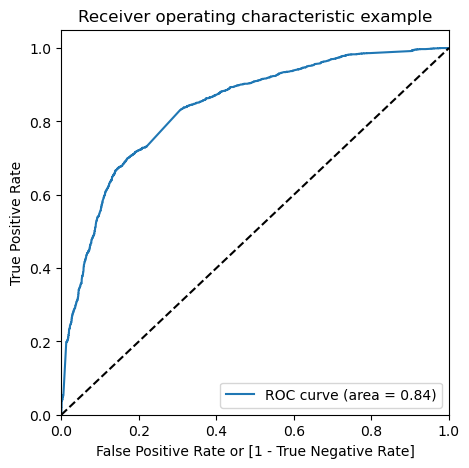

In [122]:
# Calling the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.ConvertedProb)

The ROC curve's area under the curve is 0.84, indicating a promising model performance. To further fine-tune the model, we'll explore the tradeoff between sensitivity and specificity to identify the optimal cutoff point

In [123]:
# Now we wil create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.ConvertedProb.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,ConvertedProb,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.351517,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.279538,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.400433,3516,0,1,1,1,1,1,0,0,0,0,0
3,0,0.698299,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.351517,3934,0,1,1,1,1,0,0,0,0,0,0


In [124]:
# Now we create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.531231  0.982563  0.253123
0.2   0.2  0.628633  0.926196  0.445277
0.3   0.3  0.719542  0.856042  0.635432
0.4   0.4  0.775974  0.707218  0.818341
0.5   0.5  0.783086  0.641930  0.870065
0.6   0.6  0.770408  0.563666  0.897801
0.7   0.7  0.745826  0.451338  0.927286
0.8   0.8  0.712121  0.311436  0.959020
0.9   0.9  0.686147  0.202352  0.984258


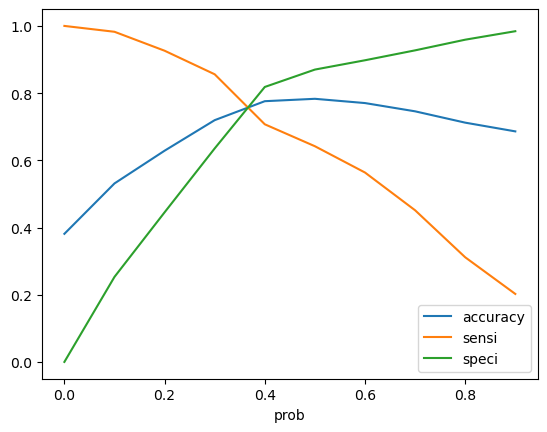

In [125]:
# plot it for clear visual
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

0.36 is the approximate point where all the curves meet, so 0.36 seems to be our Optimal cutoff point for probability threshold

In [126]:
y_train_pred_final['final_predicted'] = y_train_pred_final.ConvertedProb.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Converted,ConvertedProb,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.351517,1871,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.279538,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.400433,3516,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.698299,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.351517,3934,0,1,1,1,1,0,0,0,0,0,0,0


In [127]:
# Let's check the accuracy now
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7640692640692641

In [128]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3146,  856],
       [ 670, 1796]])

In [129]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [130]:
# Calculate Sensitivity/Recall

TP/(TP+FN)

0.7283049472830495

In [131]:
# Calculate Specificity

TN/(TN+FP)

0.7861069465267366

In [134]:
precision = TP/(TP+FP)
recall = TP/(TP+FN)

In [136]:
#from sklearn.metrics import precision_recall_curve
# y_train_pred_final.Converted, y_train_pred_final.final_predicted
# p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.ConvertedProb)

In [137]:
# plt.plot(thresholds, p[:-1], "g-")
# plt.plot(thresholds, r[:-1], "r-")
# plt.show()

In [138]:
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1 Score:", f1_score)

F1 Score: 0.7018366549433372


**F1 Score of 0.702 Represents a reasonable balance between precision and recall. Hence we are good to go**

**For Train data**
- Accuracy : 76.40%
- Sensitivity : 72.83%
- Specificity : 78.61%

## Step5:  Adding Lead Score to the Training Data 

A higher score would mean that is most likely to convert
Whereas a lower score would mean that the lead will mostly not get converted.

In [139]:
# Lets add Lead Score 

y_train_pred_final['High_lead_Score'] = y_train_pred_final['ConvertedProb'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,ConvertedProb,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,High_lead_Score
0,0,0.351517,1871,0,1,1,1,1,0,0,0,0,0,0,0,35
1,0,0.279538,6795,0,1,1,1,0,0,0,0,0,0,0,0,28
2,0,0.400433,3516,0,1,1,1,1,1,0,0,0,0,0,1,40
3,0,0.698299,8105,1,1,1,1,1,1,1,1,0,0,0,1,70
4,0,0.351517,3934,0,1,1,1,1,0,0,0,0,0,0,0,35


## Step6: Making Prediction using the Final Model with Test Data

#### Scaling Test dataset

In [140]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [141]:
# Display the scaled DataFrame
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_category,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4269,0.863900,0.964504,2.604962,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2376,-0.645678,-0.885371,-1.062143,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7766,0.297808,-0.777416,1.229797,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9199,-0.645678,-0.885371,-1.062143,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4359,-0.645678,-0.885371,-1.062143,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [142]:
print(X_test.shape)

(2772, 110)


In [143]:
cols = X_train_rfe3.columns
X_test1 = X_test[cols]
y_test_pred = model4.predict(X_test1)
y_test_pred[:10]

4269    0.671492
2376    0.913202
7766    0.302253
9199    0.061066
4359    0.913202
9186    0.406694
1631    0.601551
8963    0.395305
8007    0.061484
5324    0.219660
dtype: float64

In [144]:
# Converting y_pred to a dataframe

y_test_pred_d = pd.DataFrame(y_test_pred)
y_test_pred_d .head()

,0
4269,0.671492
2376,0.913202
7766,0.302253
9199,0.061066
4359,0.913202


In [145]:
# Converting y_test to dataframe
y_test_d = pd.DataFrame(y_test)

In [146]:
# Removing index for both dataframes to append them side by side 

y_test_pred_d.reset_index(drop=True, inplace=True)
y_test_d.reset_index(drop=True, inplace=True)

In [147]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_pred_d,y_test_d],axis=1)

In [148]:
# Checking the 'y_pred_final'
y_pred_final.head()

,0,Converted
0,0.671492,1
1,0.913202,1
2,0.302253,1
3,0.061066,0
4,0.913202,1


In [149]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'ConvertedProb'})
y_pred_final.head()

,ConvertedProb,Converted
0,0.671492,1
1,0.913202,1
2,0.302253,1
3,0.061066,0
4,0.913202,1


In [150]:
# Make predictions on the test set using 0.36 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.ConvertedProb.map(lambda x: 1 if x > 0.36 else 0)
# Checking y_pred_final
y_pred_final.head()

,ConvertedProb,Converted,final_predicted
0,0.671492,1,1
1,0.913202,1,1
2,0.302253,1,0
3,0.061066,0,0
4,0.913202,1,1


## Step7: Machine Learning Model Analysis along with Test Data

### Finding the Optimal Cutoff

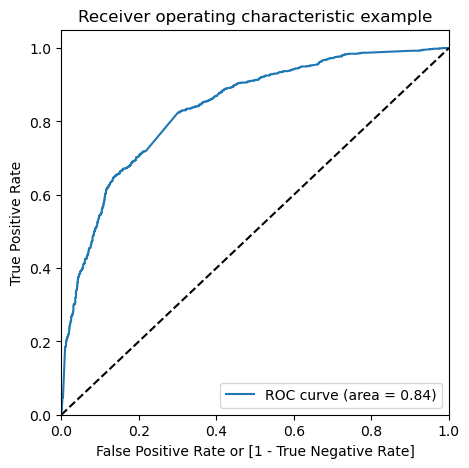

In [151]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], 
                                         y_pred_final["ConvertedProb"], 
                                         drop_intermediate = False )
# Calling the ROC function
draw_roc(y_pred_final.Converted, y_pred_final.ConvertedProb)

**Area under ROC curve is 0.84 out of 1 which indicates a good predictive model**

### Confusion Matrix

In [152]:
# Checking overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7611832611832612

In [153]:
confusion = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion

array([[1325,  352],
       [ 310,  785]])

In [154]:
# Evaluate the other metrics as well
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [155]:
# Calculating the 'sensitivity'
TP / float(TP+FN)

0.7283049472830495

In [156]:
# Calculating the 'specificity'
TN / float(TN+FP)

0.7861069465267366

In [157]:
# Calculating the Precision
TP/(TP+FP)

0.6772247360482655

In [158]:
# Calculating Recall
TP/(TP+FN)

0.7283049472830495

**For Test data**
- Accuracy : 76.11%
- Sensitivity : 72.83%
- Specificity : 78.61%

**These matrics are almost same as train set, so out final model4 is performing with good consistency on both Train & Test data**



In [159]:
# features and their coefficicent from final model
param=model4.params.sort_values(ascending=False)
param

Lead Origin_Lead Add Form                  3.306135
Last Activity_Had a Phone Conversation     1.519508
Total Time Spent on Website                1.076119
Lead Source_Olark Chat                     0.340387
Lead Source_Direct Traffic                -0.322981
Lead Origin_Landing Page Submission       -0.629927
Last Activity_Form Submitted on Website   -1.055841
Last Activity_Email Link Clicked          -1.060514
Last Activity_Converted to Lead           -1.820172
Last Activity_Olark Chat Conversation     -2.120415
Last Activity_Email Bounced               -2.582260
dtype: float64

**A high positive coefficient indicates that a variable has a stronger influence on predicting the probability of leads converting to take the course.**

### Adding Lead Score Feature to Test dataframe

In [160]:
y_pred_final['High_lead_Score'] = y_pred_final['ConvertedProb'].map( lambda x: round(x*100))
y_pred_final.head()

,ConvertedProb,Converted,final_predicted,High_lead_Score
0,0.671492,1,1,67
1,0.913202,1,1,91
2,0.302253,1,0,30
3,0.061066,0,0,6
4,0.913202,1,1,91


**Higher lead score have a higher conversion chance**

**Lower lead score have a lower conversion chance**

## Step8: Conclusion/Inference From Machine Learning Model

As seen from our final model, following are the Parameters which help us to predict the probablity of Leads conversion and hence increasing the Chances of Lead Conversion from 30% to higher than 70 %:

- Lead Origin_Lead Add Form                  3.306135
- Last Activity_Had a Phone Conversation     1.519508
- Total Time Spent on Website                1.076119
- Lead Source_Olark Chat                     0.340387
- Lead Source_Direct Traffic                -0.322981
- Lead Origin_Landing Page Submission       -0.629927
- Last Activity_Form Submitted on Website   -1.055841
- Last Activity_Email Link Clicked          -1.060514
- Last Activity_Converted to Lead           -1.820172
- Last Activity_Olark Chat Conversation     -2.120415
- Last Activity_Email Bounced               -2.582260

Based on the Logistic Regression Model final Features with positive coefficients, such as "Lead Origin_Lead Add Form," "Last Activity_Had a Phone Conversation," and "Total Time Spent on Website," have a stronger positive influence on predicting the probability of leads converting to take the course. Higher values in these features increase the likelihood of conversion. 
And negative coefficients, like "Last Activity_Olark Chat Conversation" and "Last Activity_Email Bounced," have a negative influence on the conversion probability. Higher values in these features decrease the likelihood of conversion.

We found that Overall Model Performance (Training Data):
Accuracy: 76.40%
Sensitivity (Recall): 72.83%
Specificity: 78.61%
F1 Score: 0.7018
Overall Model Performance Test Data:
Accuracy: 76.11%
Sensitivity (Recall): 72.83%
Specificity: 78.61%
The evaluation matrics for Test and Training Data are pretty close to each other which indicates that the model is performing consistently across different evaluation metrics. Also, the model's overall performance is good, as indicated by accuracy and F1 Score, emphasizes its effectiveness in predicting lead conversion outcomes.